## When are our fields up and where is the sun?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
from astropy.time import Time
from astropy.coordinates import get_body
from astropy.coordinates import Angle, SkyCoord, EarthLocation, AltAz
from astropy.coordinates import ICRS, Galactic, FK4, FK5, GeocentricMeanEcliptic

In [2]:
mcmurdo = EarthLocation(lat='-77.8419', lon='166.6863', height=37000.)
launch_date = Time('2026-12-25 00:00:00', scale='utc', location = mcmurdo)
launch_date  = Time('2027-01-13 00:00:00', scale='utc', location = mcmurdo)
times = launch_date + np.arange(25)*u.hr

In [3]:
%%time
sun_body = get_body('sun', times, location=mcmurdo)

CPU times: user 380 ms, sys: 38.8 ms, total: 418 ms
Wall time: 423 ms


In [4]:
%%time
sun = SkyCoord(ra=sun_body.ra, dec=sun_body.dec, obstime=times, location=mcmurdo)
sun_altaz = sun.transform_to('altaz')

CPU times: user 29.3 ms, sys: 2.53 ms, total: 31.9 ms
Wall time: 32 ms


In [5]:
%%time
field_S = SkyCoord(ra=12*15.*u.degree,dec=-55*u.degree, 
                   obstime=times, location=mcmurdo)
field_S_altaz = field_S.transform_to('altaz')

CPU times: user 5.75 ms, sys: 0 ns, total: 5.75 ms
Wall time: 5.78 ms


In [6]:
%%time
field_N = SkyCoord(ra=3.*15*u.degree,dec=-27*u.degree, 
                   obstime=times, location=mcmurdo)
field_N_altaz = field_N.transform_to('altaz')

CPU times: user 11.1 ms, sys: 403 µs, total: 11.5 ms
Wall time: 11.5 ms


In [7]:
RCW38 = SkyCoord(ra='08h57m23.57s', dec='-47d18m56.1s', obstime=times, location=mcmurdo)
RCW38_altaz = RCW38.transform_to('altaz')

In [8]:
#15 14 44.7 -56 27 28
RCW92b = SkyCoord(ra='15h14m44.7s', dec='-56d27m28s', obstime=times, location=mcmurdo)
RCW92b_altaz = RCW92b.transform_to('altaz')

In [9]:
SEP_radec = SkyCoord(0, -90, unit='deg', frame=GeocentricMeanEcliptic).transform_to(ICRS) 
SEP = SkyCoord(ra=SEP_radec.ra, dec=SEP_radec.dec+5*u.deg, obstime = times, location = mcmurdo)
SEP_altaz = SEP.transform_to('altaz')

In [10]:
t_hr = (times - times[0]).to(u.hr)

In [11]:
colors = {'sun': 'orange', 'S': 'blue', 'N': 'green', 'cal': 'magenta'}

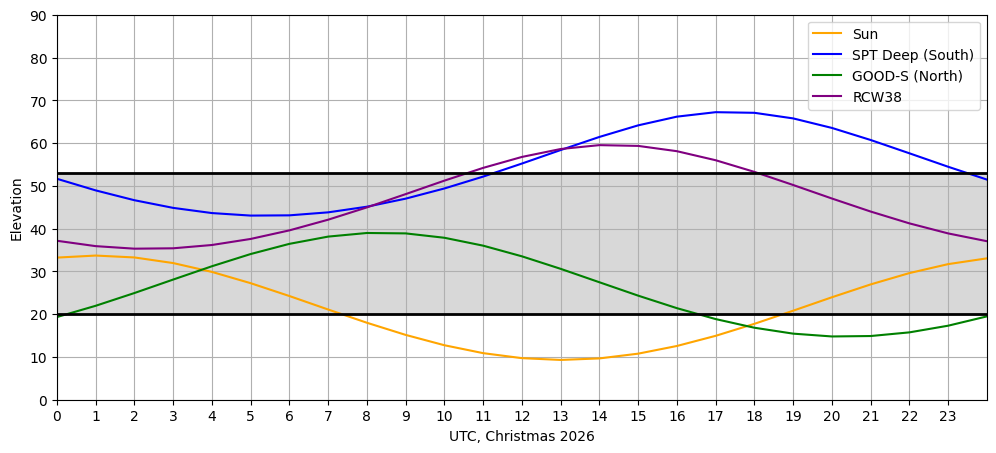

In [12]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_hr, sun_altaz.alt, label='Sun', color='orange')
ax.plot(t_hr, field_S_altaz.alt, label='SPT Deep (South)', color='blue')
ax.plot(t_hr, field_N_altaz.alt, label='GOOD-S (North)', color='green')
#ax.plot(t_hr, SEP_altaz.alt, label='SEP + 5 deg')
ax.plot(t_hr, RCW38_altaz.alt, label='RCW38', color='purple')
#ax.plot(t_hr, RCW92b_altaz.alt, label='RCW92b')
ax.axhline(20, color='black', linewidth=2)
ax.axhline(53, color='black', linewidth=2)
ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
ax.set_ylim([0,90])
ax.set_xlim([0, 24])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_xlabel('UTC, Christmas 2026')
ax.set_ylabel('Elevation')
ax.legend();

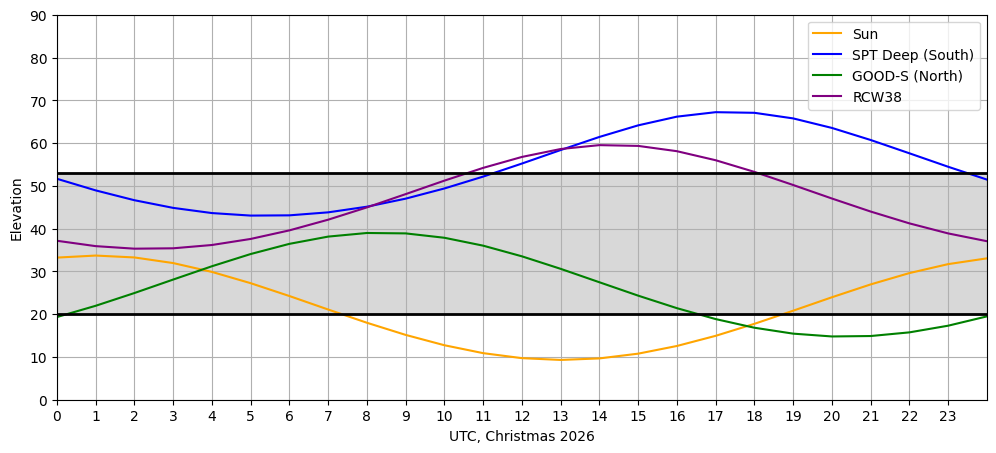

In [13]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_hr, sun_altaz.alt, label='Sun', color='orange')
ax.plot(t_hr, field_S_altaz.alt, label='SPT Deep (South)', color='blue')
ax.plot(t_hr, field_N_altaz.alt, label='GOOD-S (North)', color='green')
#ax.plot(t_hr, SEP_altaz.alt, label='SEP + 5 deg')
ax.plot(t_hr, RCW38_altaz.alt, label='RCW38', color='purple')
#ax.plot(t_hr, RCW92b_altaz.alt, label='RCW92b')
ax.axhline(20, color='black', linewidth=2)
ax.axhline(53, color='black', linewidth=2)
ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
ax.set_ylim([0,90])
ax.set_xlim([0, 24])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_xlabel('UTC, Christmas 2026')
ax.set_ylabel('Elevation')
ax.legend();

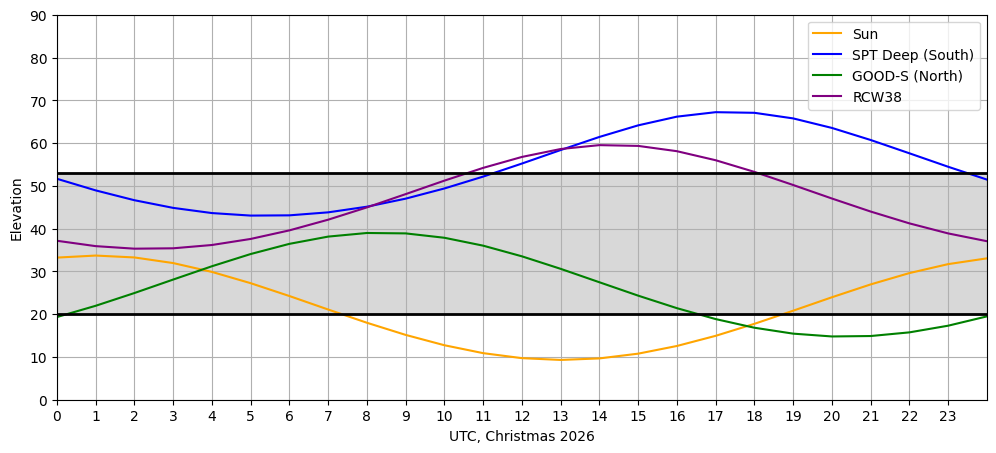

In [14]:
# Make this with LST as the axis
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_hr, sun_altaz.alt, label='Sun', color='orange')
ax.plot(t_hr, field_S_altaz.alt, label='SPT Deep (South)', color='blue')
ax.plot(t_hr, field_N_altaz.alt, label='GOOD-S (North)', color='green')
#ax.plot(t_hr, SEP_altaz.alt, label='SEP + 5 deg')
ax.plot(t_hr, RCW38_altaz.alt, label='RCW38', color='purple')
#ax.plot(t_hr, RCW92b_altaz.alt, label='RCW92b')
ax.axhline(20, color='black', linewidth=2)
ax.axhline(53, color='black', linewidth=2)
ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
ax.set_ylim([0,90])
ax.set_xlim([0, 24])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_xlabel('UTC, Christmas 2026')
ax.set_ylabel('Elevation')
ax.legend();

In [15]:
def small_ang(t1, t2):
    
    ''' Calculate the shortest angular distance between two angles '''
    
    stck = np.stack([t1, -t2])
    
    dt1 = np.abs(stck.sum(axis=0))
    dt2 = 360 - dt1
    
    dt = np.stack([dt1, dt2])
    
    #print(dt1, dt2)
    ang = np.min(dt, axis=0)
    
    
    return ang

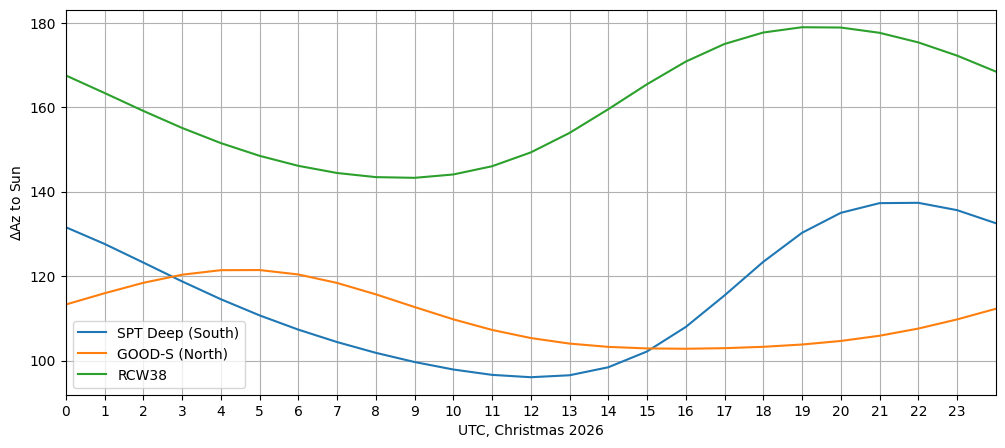

In [16]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t_hr, sun_altaz.alt, label='Sun')
ax.plot(t_hr, small_ang(field_S_altaz.az.deg, sun_altaz.az.deg), label='SPT Deep (South)')
ax.plot(t_hr, small_ang(field_N_altaz.az.deg, sun_altaz.az.deg), label='GOOD-S (North)')
#ax.plot(t_hr, SEP_altaz.az - sun_altaz.az, label='SEP + 5 deg')
ax.plot(t_hr, small_ang(RCW38_altaz.az.deg, sun_altaz.az.deg), label='RCW38')
#ax.plot(t_hr, RCW92b_altaz.az - sun_altaz.az, label='RCW92b')
#ax.axhline(20, color='black', linewidth=2)
#ax.axhline(53, color='black', linewidth=2)
#ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
#ax.set_ylim([])
ax.set_xlim([0, 24])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_xlabel('UTC, Christmas 2026')
ax.set_ylabel('$\Delta$Az to Sun')
ax.legend();

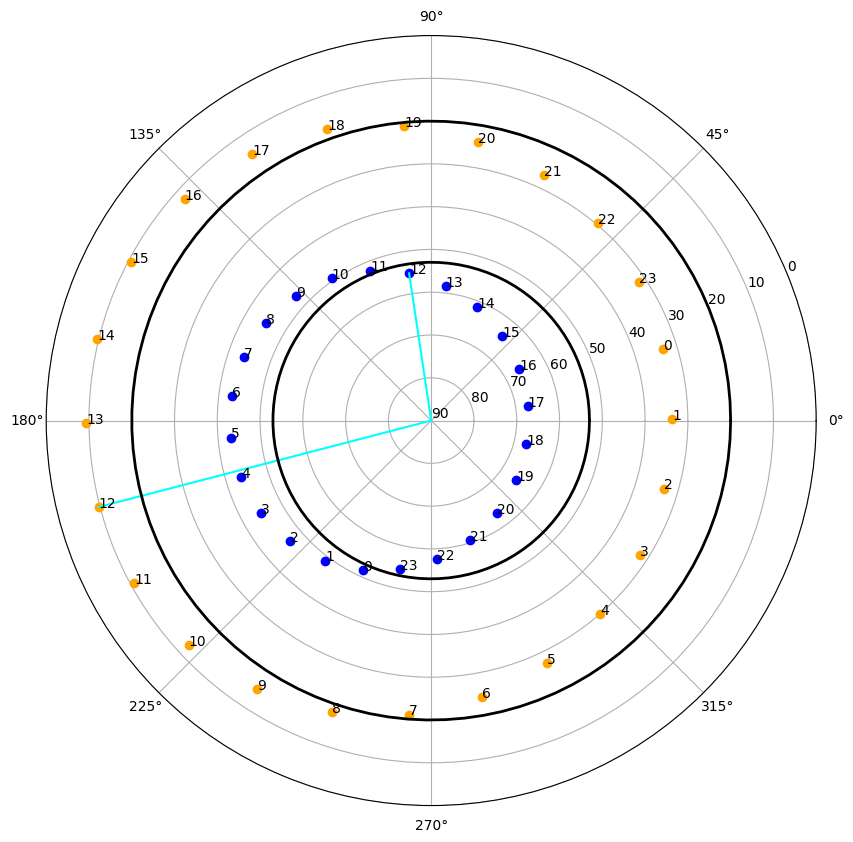

In [17]:
plt.figure(figsize=(10,10))
for i in np.arange(0, len(t_hr)-1):
    
    r_sun = sun_altaz.alt[i].value
    theta_sun = sun_altaz.az.to(u.rad)[i].value
    
    r_S = field_S_altaz.alt[i].value
    theta_S = field_S_altaz.az.to(u.rad)[i].value 
    
    plt.polar(theta_sun, r_sun, marker='o', color='orange')
    plt.text(theta_sun, r_sun, '{:d}'.format(int(np.round(t_hr[i].value))))
    
    plt.polar(theta_S, r_S, marker='o', color='blue')
    plt.text(theta_S, r_S, '{:d}'.format(int(np.round(t_hr[i].value))))
    
    if i == 12:
        plt.polar([90, theta_S], [90, r_S], color='cyan')
        plt.polar([90, theta_sun], [90, r_sun], color='cyan')
    
plt.polar(np.linspace(0, 2*np.pi, 100), np.ones(100)*20, color='black', linewidth=2)
plt.polar(np.linspace(0, 2*np.pi, 100), np.ones(100)*53, color='black', linewidth=2)
    
plt.ylim([90, 0])
plt.savefig('polar_view.png')

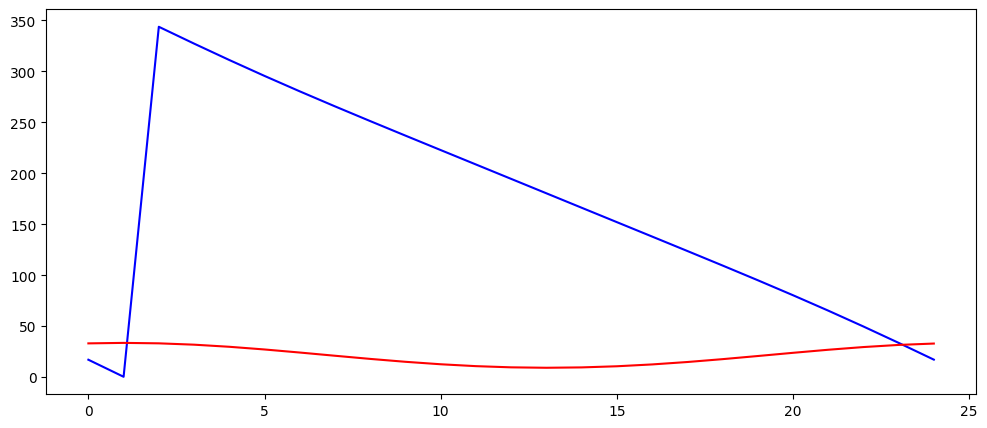

In [18]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_hr, sun_altaz.az, label='Az', color='blue')
ax.plot(t_hr, sun_altaz.alt, label='Alt', color='red')